# Домашнее задание к лекции "Визуализация данных"¶
Обязательная часть Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов; каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?). Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play; данные о видео из трендов YouTube; данные об уровне счастья в разных странах; данные по фильмам и сериалам Netflix. Дополнительная часть (необязательная) построить дополнительно не менее 2 визуализаций (итого не менее 6); в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

https://www.kaggle.com/ данные по фильмам и сериалам Netflix. boxplot, heatmap, scatter plot matrix. https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('world-happiness-report-2019.csv', sep=',')
df=df.rename(columns={'Country (region)':'Country', 'Healthy life\nexpectancy': 'Healthy'})
df.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                156 non-null    object 
 1   Ladder                 156 non-null    int64  
 2   SD of Ladder           156 non-null    int64  
 3   Positive affect        155 non-null    float64
 4   Negative affect        155 non-null    float64
 5   Social support         155 non-null    float64
 6   Freedom                155 non-null    float64
 7   Corruption             148 non-null    float64
 8   Generosity             155 non-null    float64
 9   Log of GDP
per capita  152 non-null    float64
 10  Healthy                150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [10]:
df = df.dropna()
print(df.shape)

(140, 11)


In [63]:
df_expensive=df.groupby('Country').mean().sort_values('Healthy', ascending=False).tail(15)
df_expensive

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy
Country,,,,,,,,,,
Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0
New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
Israel,13,14,104.0,69.0,38.0,93.0,74.0,24.0,31.0,11.0
Australia,11,26,47.0,37.0,7.0,17.0,13.0,6.0,18.0,10.0
South Korea,54,57,101.0,45.0,91.0,144.0,100.0,40.0,27.0,9.0
Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
Italy,36,31,99.0,123.0,23.0,132.0,128.0,48.0,29.0,7.0


# 1. График

Вывод по графику: визуально видно, что Positive affect не влияют на здоровый образ жизни. Изчего следует вывод, что не во всех странах со здоровым образом жизни люди испытывают позитивные эмоции. 

Text(0, 0.5, 'Country')

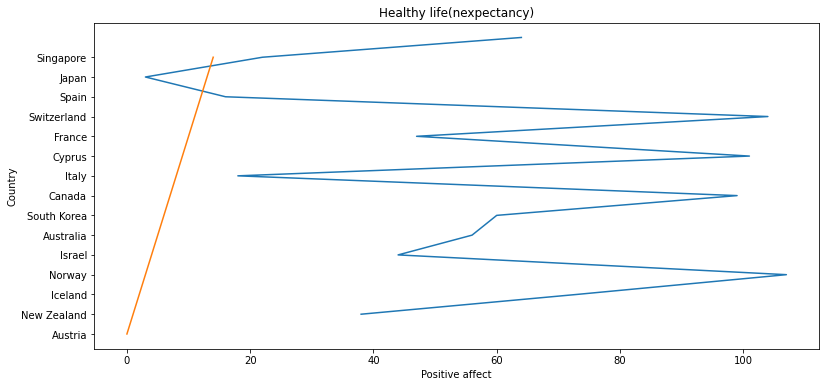

In [64]:
plt.plot(df_expensive['Positive affect'], df_expensive.Healthy, df_expensive.index)
plt.title('Healthy life(nexpectancy)')
plt.xlabel('Positive affect')
plt.ylabel('Healthy')
plt.ylabel('Country')


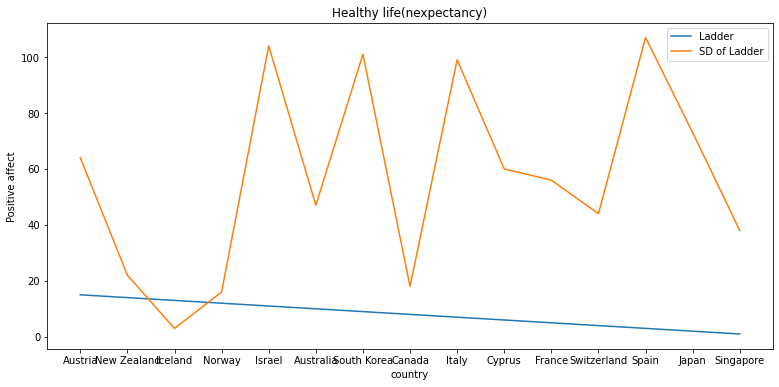

In [65]:
# можем использовать цикл, чтобы пострить графики для каждого региона
for healthy in [x for x in df.columns if 'Healthy' in x]:
    plt.plot(df_expensive.index, df_expensive[healthy], df_expensive['Positive affect'])
    plt.title('Healthy life(nexpectancy)')
    plt.xlabel('country')
    plt.ylabel('healthy') 
    plt.ylabel('Positive affect')
    plt.legend(df_expensive)

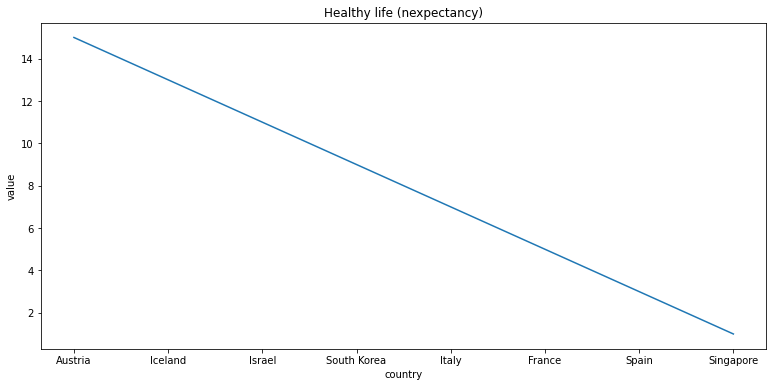

In [38]:
# если работает с табличными структурами, то можем воспользоваться функционалом, 
# встроенным в pandas. Так удобнее
# Метод plot по-умолчанию использует индекс датафрейма для оси Y
# метод plot по-умолчанию строит график
df_expensive['Healthy'].plot(title='Healthy life (nexpectancy)', 
                                        xlabel='country', 
                                        ylabel='value')

#ax.set_xlabel('skdj') если вдруг выжает ошибку, но без год и продажи. 
#возможно разные библиотеки 

# 2. Area chart
Сложно по этому графику, что-то оценить. Цвета не слишком выделяются и пики находятся ммежду странами. 

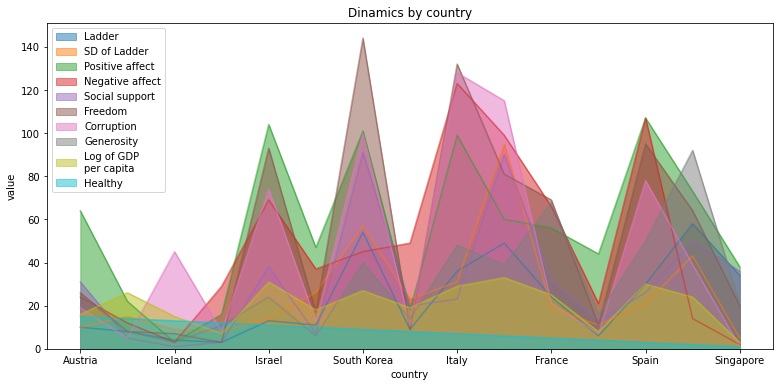

In [39]:
ax = df_expensive.plot(kind='area',
                       stacked=False, #закращеная площадь kind привязан к нему
                       title='Dinamics by country', 
                       xlabel='country', 
                       ylabel='value')

# 3. Гистограмма
Из двух графиков гистаграммы можно сделать выводы по распределению эмоций (позитивных и негативных). В начале графиков видно, что количество стран с негативными эмоциями выше, относительно тех у кого много положительных, но при этом в конце графика видно, что количество стран с количеством позитиных эмоций больше на уровне 100, чем количество стран с негатиными эмоциями в районе 100-120. Так же и там и там есть пробелы в районе 75-100.

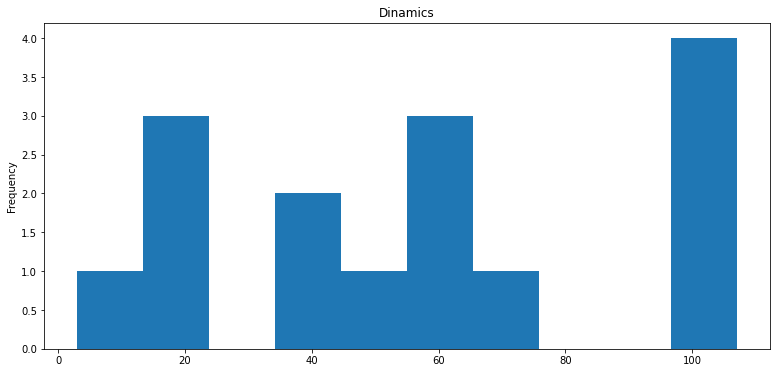

In [117]:
df_expensive['Positive affect'].plot(kind='hist', 
                #bins=11,
                title='Dinamics',
                xlabel='Positive affect',
                ylabel='value')

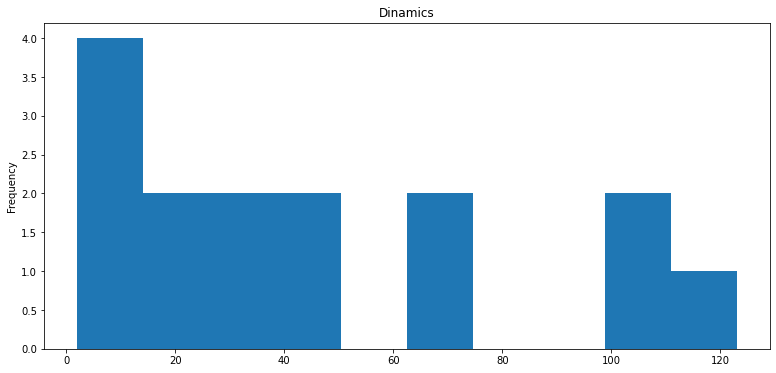

In [116]:
df_expensive['Negative affect'].plot(kind='hist', 
                #bins=11,
                title='Dinamics',
                xlabel='Negative affect',
                ylabel='value')

# 4. Столбчатая диаграмма
По графику видно, что самые низкие показатели у Сингапура, Исландии и Норвегии (группировка по здаровому образу жизни, 15 стран). Но при этом в эти 15 стран входит Южная Корея и Италия, которые выделяются высоким показателем Freedom. А также Кипр, Юная Корея, Израиль и Испания с высоким показателем коррупции. 

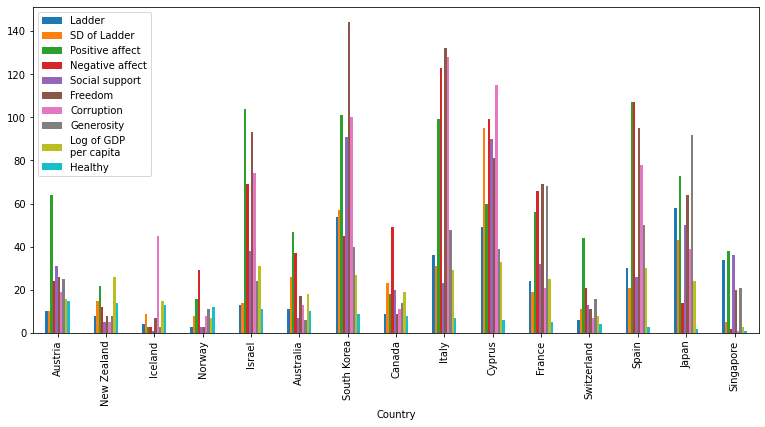

In [106]:
df_expensive.plot(kind='bar')

# 5. Boxplot

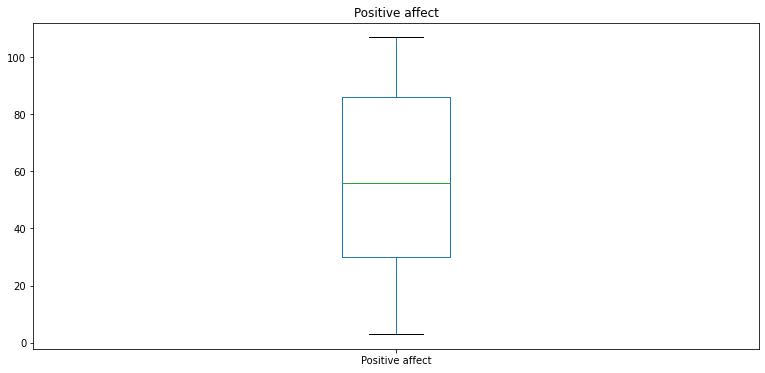

In [114]:
df_expensive['Positive affect'].plot(kind='box',
                   title='Positive affect')

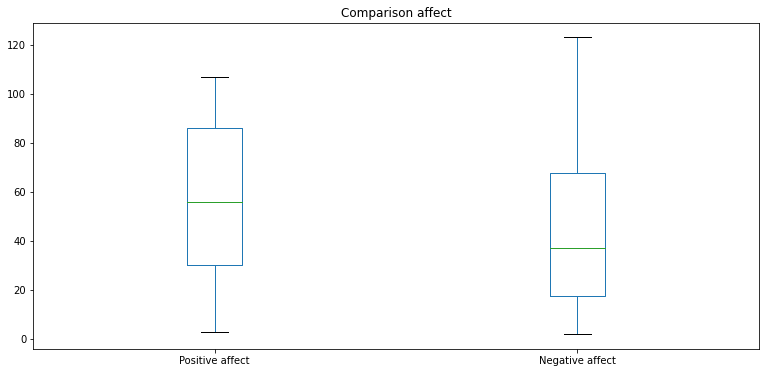

In [115]:
df_expensive[['Positive affect', 'Negative affect']].plot(kind='box',
                                        title='Comparison affect')
#на данном графики видно, что медиана позитивных эмоций выше у стран с высоким здоровым образом жизни и составляет почти 60, 
#при этом с негативным примерно 40.

# 6. Точечная диаграмма
На данном графики очень похожая картика как на Гистограмме

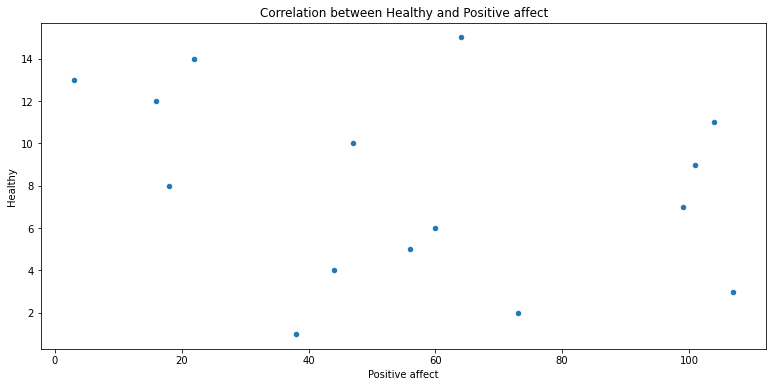

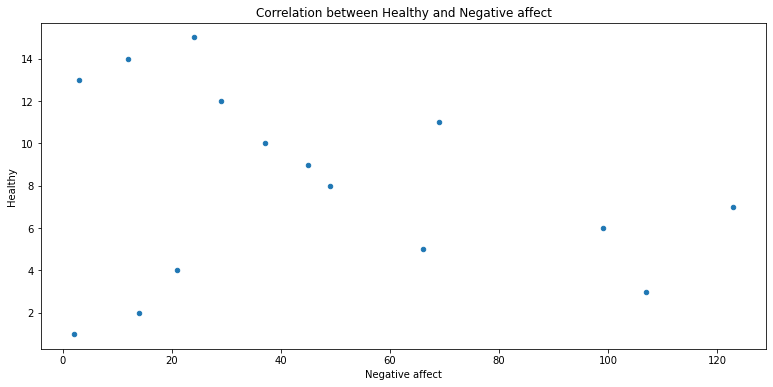

In [119]:
# посмотрим на взимосвязь оценок и продаж
df_expensive.plot(kind='scatter', 
        x='Positive affect', 
        y='Healthy', 
        title='Correlation between Healthy and Positive affect')
plt.show()
df_expensive.plot(kind='scatter', 
        x='Negative affect', 
        y='Healthy', 
        title='Correlation between Healthy and Negative affect')